IMPORT LIBRARY YANG DIPERLUKAN

In [ ]:
#Mengimpor Library TensorFlow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

LOAD DATASET

In [ ]:
# Unduh dan ekstrak dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

EKSTRAKSI DATA DARI FILE ZIP

In [ ]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validasi_dir = os.path.join(base_dir, 'validasi')

In [ ]:
os.listdir(base_dir)

['scissors', 'paper', 'README_rpc-cv-images.txt', 'rock']

MENENTUKAN DIREKTORI DARI TIAP KELAS

In [ ]:
train_scissors_dir = os.path.join(train_dir, 'scissors')

train_paper_dir = os.path.join(train_dir, 'paper')

train_rock_dir = os.path.join(train_dir, 'rock')

validation_scissors_dir = os.path.join(validasi_dir, 'scissors')

validation_paper_dir = os.path.join(validasi_dir, 'paper')

validation_rock_dir = os.path.join(validasi_dir, 'rock')

SPLITTING DATA DI DATA VALIDASI DAN DATA TRAINING

In [ ]:
# Membuat objek ImageDataGenerator untuk pelatihan dan validasi
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    validation_split=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    rescale=1./255,
    rotation_range=20,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Hanya satu generator untuk seluruh dataset
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    shuffle=True,
    subset='training'
)

# Data validation akan diambil dari bagian yang tidak termasuk dalam subset 'training'
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


KONFIGURASI MODEL SEQUENTIAL

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
                                    tf.keras.layers.Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
                                    tf.keras.layers.Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
                                    tf.keras.layers.Conv2D(256, (3,3), strides = (1,1), activation = 'relu' ),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
                                    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation='softmax') ])

In [ ]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs',
    histogram_freq=0,
    update_freq='epoch',
    embeddings_freq=0,
    embeddings_metadata=None
)

MENAMPILKAN MODEL SUMMARRY DAN MENGGUNAKAN OPTIMIZER ADAM OPTIMIZER

In [ ]:
model.summary()

tf.optimizers.Adam(learning_rate=0.0002, name='Adam')
model.compile(loss = 'categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

PELATIHAN MODEL DAN RIWAYAT DISIMPAN SERTA VISUALISASI MODEL MENGGUNAKAN GRAFIK LOSS, AKURASI

In [ ]:
# Melatih model dan menyimpan riwayat
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[lr_schedule])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
42/42 [==============================] - 94s 2s/step - loss: 1.0223 - accuracy: 0.4886 - val_loss: 0.7341 - val_accuracy: 0.7094 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
42/42 [==============================] - 95s 2s/step - loss: 0.5619 - accuracy: 0.7930 - val_loss: 0.3774 - val_accuracy: 0.8650 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
42/42 [==============================] - 103s 2s/step - loss: 0.3834 - accuracy: 0.8478 - val_loss: 0.4806 - val_accuracy: 0.8421 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
42/42 [==============================] - 98s 2s/step - loss: 0.3781 - accuracy: 0.8600 - val_loss: 0.3602 - val_accuracy: 0.8696 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.00100000

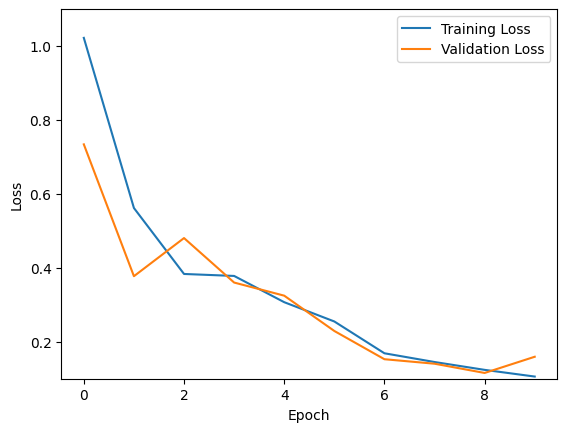

In [ ]:
import matplotlib.pyplot as plt
# Visualisasi grafik loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0.1, 1.1])
plt.show()

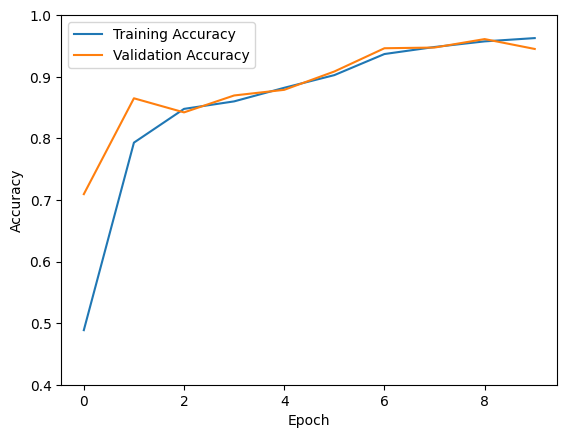

In [ ]:
# Visualisasi grafik akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.4, 1.0])
plt.show()

UPLOAD GAMBAR DAN PREDIKSI

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL (2).png
1/1 [==============================] - 0s 36ms/step
0ePX1wuCc3et7leL (2).png
GUNTING


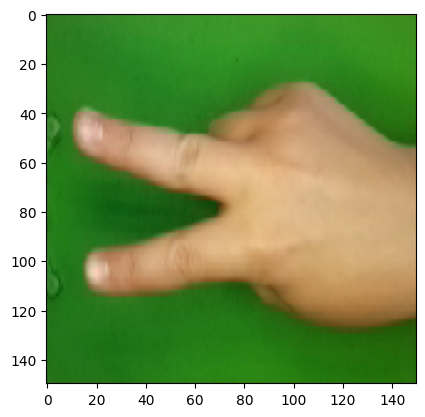

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for foto in uploaded.keys():
  path = foto
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  w = image.img_to_array(img)
  w = np.expand_dims(w, axis = 0)

  images = np.vstack([w])
  klasifikasi = model.predict(images, batch_size = 10)

  print(foto)
  if klasifikasi[0,0]!=0:
    print('KERTAS')
  elif klasifikasi [0,1]!=0:
    print('BATU')
  else:
    print('GUNTING')

Saving 1UucZqS3qblvU0cH.png to 1UucZqS3qblvU0cH.png
1/1 [==============================] - 0s 40ms/step
1UucZqS3qblvU0cH.png
BATU


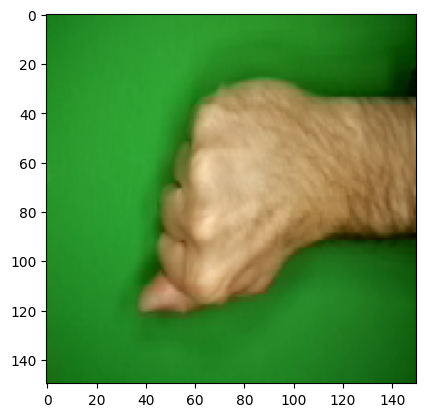

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for foto in uploaded.keys():
  path = foto
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  w = image.img_to_array(img)
  w = np.expand_dims(w, axis = 0)

  images = np.vstack([w])
  klasifikasi = model.predict(images, batch_size = 10)

  print(foto)
  if klasifikasi[0,0]!=0:
    print('KERTAS')
  elif klasifikasi [0,1]!=0:
    print('BATU')
  else:
    print('GUNTING')

Saving 0a3UtNzl5Ll3sq8K.png to 0a3UtNzl5Ll3sq8K.png
1/1 [==============================] - 0s 49ms/step
0a3UtNzl5Ll3sq8K.png
KERTAS


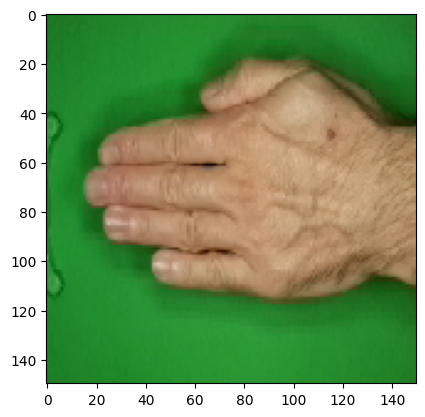

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for foto in uploaded.keys():
  path = foto
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  w = image.img_to_array(img)
  w = np.expand_dims(w, axis = 0)

  images = np.vstack([w])
  klasifikasi = model.predict(images, batch_size = 10)

  print(foto)
  if klasifikasi[0,0]!=0:
    print('KERTAS')
  elif klasifikasi [0,1]!=0:
    print('BATU')
  else:
    print('GUNTING')

Saving WhatsApp Image 2023-12-07 at 02.01.59.jpeg to WhatsApp Image 2023-12-07 at 02.01.59 (3).jpeg
1/1 [==============================] - 0s 39ms/step
WhatsApp Image 2023-12-07 at 02.01.59 (3).jpeg
GUNTING


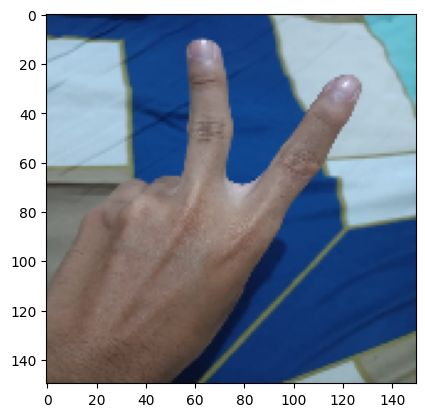

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for foto in uploaded.keys():
  path = foto
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  w = image.img_to_array(img)
  w = np.expand_dims(w, axis = 0)

  images = np.vstack([w])
  klasifikasi = model.predict(images, batch_size = 10)

  print(foto)
  if klasifikasi[0,0]!=0:
    print('KERTAS')
  elif klasifikasi [0,1]!=0:
    print('BATU')
  else:
    print('GUNTING')

Saving WhatsApp Image 2023-12-07 at 02.07.43 (1).jpeg to WhatsApp Image 2023-12-07 at 02.07.43 (1).jpeg
1/1 [==============================] - 0s 34ms/step
WhatsApp Image 2023-12-07 at 02.07.43 (1).jpeg
KERTAS


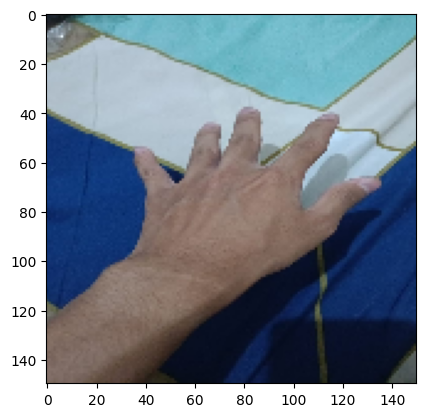

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for foto in uploaded.keys():
  path = foto
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  w = image.img_to_array(img)
  w = np.expand_dims(w, axis = 0)

  images = np.vstack([w])
  klasifikasi = model.predict(images, batch_size = 10)

  print(foto)
  if klasifikasi[0,0]!=0:
    print('KERTAS')
  elif klasifikasi [0,1]!=0:
    print('BATU')
  else:
    print('GUNTING')